<a href="https://colab.research.google.com/github/NuoWenLei/LSTM_Webscrap_Notebooks/blob/main/notebooks/Data_Exploration_and_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/gdrive/MyDrive/PACA_folder/Stock_LSTM/LSTM_stock_dataset_9-28.csv")

In [3]:
df.head()

,symbol,sharePrice,percentYearIncrease,market_cap,analystRecommend,totalSentiment,cnnP/S,popularity,relevance,ytdPercent,yahooOutlookLevel,fair_value,guruRating,sector,industry,sectorSuccess,5-Year EBITDA Growth Rate,Altman Z-Score,Beneish M-Score,Book Value per Share,Cash per Share,Dividends per Share,E10,Earnings per Share (Diluted),EBIT per Share,EBITDA per Share,EPS without NRI,FFO per Share,Financial Strength,Float Percentage Of Total Shares Outstanding,Free Cash Flow per Share,Insider Ownership,Institutional Ownership,Net Cash per Share,Net Current Asset Value,Net-Net Working Capital,Owner Earnings per Share (TTM),Piotroski F-Score,Predictability Rank,Profitability Rank,...,Effective Interest Rate on Debt %,Equity-to-Asset,EV-to-EBIT,EV-to-EBITDA,EV-to-Revenue,Forward PE Ratio,Forward Rate of Return (Yacktman) %,Goodwill-to-Asset,Gross-Profit-to-Asset %,Inventory Turnover,Inventory-to-Revenue,LT-Debt-to-Total-Asset,PB Ratio,PEG Ratio,Price-to-Free-Cash-Flow,Price-to-Funds-From-Operations,Price-to-Operating-Cash-Flow,Price-to-Owner-Earnings,Price-to-Tangible-Book,PS Ratio,Quick Ratio,Return-on-Tangible-Asset,ROA %,ROC %,ROC (Joel Greenblatt) %,ROCE %,ROE %,ROE % Adjusted to Book Value,ROIC %,Shares Buyback Ratio %,Shiller PE Ratio,Short Ratio,Sloan Ratio %,WACC %,FCF Margin %,Gross Margin %,Net Interest Margin (Bank Only) %,Net Margin %,Operating Margin %,dates
0,EGHT,24.4900,0.017327,2.650000e+09,12.000000,0.118434,6.44,1.287779,19110,-29.74,-3,-1,1.0,0,0,3,0.0,2.13,-3.14,1.47,1.40,0.0,-0.43,-1.57,-1.38,-0.96,-1.57,0.0,4,73.08,-0.47,7.74,85.15,-3.34,-2.21,-2.99,-2.02,5.0,0,4,...,0.00,0.24,-19.97,-28.89,5.48,343.14,0.00,0.19,48.78,0.00,0.00,0.58,16.42,0.00,0.00,0.0,0.0,0.00,221.65,4.80,2.28,-33.61,-26.27,-33.95,-91.39,-28.54,-109.87,-4.98,-33.95,-5.77,0.00,0,-16.98,7.54,-4.57,57.77,0.0,-31.12,-27.66,2021-05-20
1,MASS,38.4800,-0.133661,1.002000e+09,10.000000,0.114246,57.75,-0.380556,96,-33.47,-4,-1,0.0,1,1,5,0.0,16.04,-2.50,5.10,5.84,0.0,0.00,0.00,0.00,0.00,0.00,0.0,6,27.65,0.00,16.07,25.62,4.38,4.81,4.65,0.00,8.0,0,1,...,4.37,0.78,0.00,0.00,0.00,0.00,0.00,0.00,13.79,2.44,0.18,0.11,7.36,0.00,0.00,0.0,0.0,0.00,7.36,0.00,15.36,-11.84,-11.84,-35.33,-99.22,-11.87,-34.03,-3.05,-35.33,-38.53,0.00,0,-9.47,7.57,15.33,55.49,0.0,-47.66,-21.62,2021-05-20
2,AMRK,54.1834,1.305743,5.496500e+08,8.660254,0.136272,0.02,4.720969,143,105.73,3,-1,0.0,2,2,18,20.8,6.97,-0.29,27.71,3.48,0.0,1.43,15.60,21.06,21.46,15.60,0.0,5,62.37,-12.85,12.15,27.40,-79.56,6.84,-50.56,-6.15,6.0,0,5,...,7.98,0.25,4.82,4.73,0.12,8.89,8.67,0.08,24.34,3.67,0.26,0.08,1.92,0.16,0.00,0.0,0.0,0.00,5.63,0.06,0.55,30.29,27.36,17.93,198.47,113.88,145.19,111.68,17.93,-58.38,37.24,0,28.85,0.89,2.53,3.33,0.0,3.74,2.60,2021-05-20
3,AOS,69.6900,0.795764,1.094700e+10,3.872983,0.122833,3.08,3.146676,238,23.86,2,-1,2.5,3,3,16,4.3,8.15,-2.74,11.42,4.11,1.0,1.82,2.41,3.13,3.62,2.41,0.0,8,74.30,3.39,0.84,77.88,-3.66,1.86,-0.22,3.32,7.0,0,8,...,2.76,0.60,20.49,17.72,3.44,25.50,5.60,0.18,36.84,1.57,0.40,0.04,5.97,6.58,20.11,0.0,18.1,20.54,11.25,3.66,1.49,17.26,12.47,23.62,79.53,22.37,21.14,3.57,23.62,-0.54,37.46,0,-7.06,7.71,11.35,37.53,0.0,12.70,15.88,2021-05-20
4,ATEN,9.5600,0.429615,6.684480e+08,4.242641,0.156627,3.50,1.697001,260,-6.09,-3,-1,0.0,0,4,3,0.0,2.92,-1.95,1.62,2.09,0.0,-0.54,0.26,0.29,0.42,0.26,0.0,7,77.01,0.52,13.49,54.72,-0.08,1.01,0.55,0.33,7.0,0,3,...,90.64,0.43,24.25,16.73,2.48,18.24,0.00,0.00,58.17,0.62,0.37,0.00,5.73,0.00,17.67,0.0,16.3,28.06,5.81,3.26,2.28,3.67,3.65,11.11,72.58,8.57,8.83,1.49,11.11,2.04,0.00,0,-4.31,6.87,2.74,77.21,0.0,4.84,7.34,2021-05-20


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

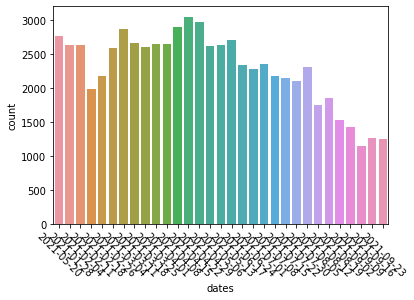

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = df.dates)
plt.xticks(rotation = -45)

In [5]:
df.symbol.unique().shape

(3822,)

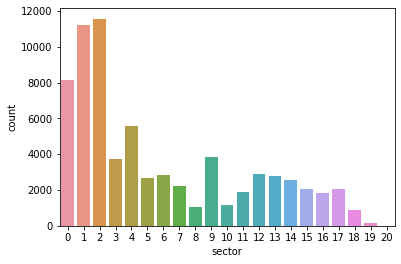

In [6]:
sns.countplot(x = df.sector)

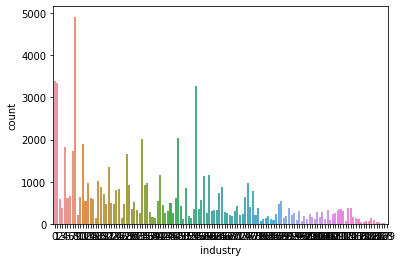

In [7]:
sns.countplot(x = df.industry)

In [9]:
df.dtypes.value_counts()

float64    89
int64      14
object      2
dtype: int64

In [10]:
df.head()

,symbol,sharePrice,percentYearIncrease,market_cap,analystRecommend,totalSentiment,cnnP/S,popularity,relevance,ytdPercent,yahooOutlookLevel,fair_value,guruRating,sector,industry,sectorSuccess,5-Year EBITDA Growth Rate,Altman Z-Score,Beneish M-Score,Book Value per Share,Cash per Share,Dividends per Share,E10,Earnings per Share (Diluted),EBIT per Share,EBITDA per Share,EPS without NRI,FFO per Share,Financial Strength,Float Percentage Of Total Shares Outstanding,Free Cash Flow per Share,Insider Ownership,Institutional Ownership,Net Cash per Share,Net Current Asset Value,Net-Net Working Capital,Owner Earnings per Share (TTM),Piotroski F-Score,Predictability Rank,Profitability Rank,...,Effective Interest Rate on Debt %,Equity-to-Asset,EV-to-EBIT,EV-to-EBITDA,EV-to-Revenue,Forward PE Ratio,Forward Rate of Return (Yacktman) %,Goodwill-to-Asset,Gross-Profit-to-Asset %,Inventory Turnover,Inventory-to-Revenue,LT-Debt-to-Total-Asset,PB Ratio,PEG Ratio,Price-to-Free-Cash-Flow,Price-to-Funds-From-Operations,Price-to-Operating-Cash-Flow,Price-to-Owner-Earnings,Price-to-Tangible-Book,PS Ratio,Quick Ratio,Return-on-Tangible-Asset,ROA %,ROC %,ROC (Joel Greenblatt) %,ROCE %,ROE %,ROE % Adjusted to Book Value,ROIC %,Shares Buyback Ratio %,Shiller PE Ratio,Short Ratio,Sloan Ratio %,WACC %,FCF Margin %,Gross Margin %,Net Interest Margin (Bank Only) %,Net Margin %,Operating Margin %,dates
0,EGHT,24.4900,0.017327,2.650000e+09,12.000000,0.118434,6.44,1.287779,19110,-29.74,-3,-1,1.0,0,0,3,0.0,2.13,-3.14,1.47,1.40,0.0,-0.43,-1.57,-1.38,-0.96,-1.57,0.0,4,73.08,-0.47,7.74,85.15,-3.34,-2.21,-2.99,-2.02,5.0,0,4,...,0.00,0.24,-19.97,-28.89,5.48,343.14,0.00,0.19,48.78,0.00,0.00,0.58,16.42,0.00,0.00,0.0,0.0,0.00,221.65,4.80,2.28,-33.61,-26.27,-33.95,-91.39,-28.54,-109.87,-4.98,-33.95,-5.77,0.00,0,-16.98,7.54,-4.57,57.77,0.0,-31.12,-27.66,2021-05-20
1,MASS,38.4800,-0.133661,1.002000e+09,10.000000,0.114246,57.75,-0.380556,96,-33.47,-4,-1,0.0,1,1,5,0.0,16.04,-2.50,5.10,5.84,0.0,0.00,0.00,0.00,0.00,0.00,0.0,6,27.65,0.00,16.07,25.62,4.38,4.81,4.65,0.00,8.0,0,1,...,4.37,0.78,0.00,0.00,0.00,0.00,0.00,0.00,13.79,2.44,0.18,0.11,7.36,0.00,0.00,0.0,0.0,0.00,7.36,0.00,15.36,-11.84,-11.84,-35.33,-99.22,-11.87,-34.03,-3.05,-35.33,-38.53,0.00,0,-9.47,7.57,15.33,55.49,0.0,-47.66,-21.62,2021-05-20
2,AMRK,54.1834,1.305743,5.496500e+08,8.660254,0.136272,0.02,4.720969,143,105.73,3,-1,0.0,2,2,18,20.8,6.97,-0.29,27.71,3.48,0.0,1.43,15.60,21.06,21.46,15.60,0.0,5,62.37,-12.85,12.15,27.40,-79.56,6.84,-50.56,-6.15,6.0,0,5,...,7.98,0.25,4.82,4.73,0.12,8.89,8.67,0.08,24.34,3.67,0.26,0.08,1.92,0.16,0.00,0.0,0.0,0.00,5.63,0.06,0.55,30.29,27.36,17.93,198.47,113.88,145.19,111.68,17.93,-58.38,37.24,0,28.85,0.89,2.53,3.33,0.0,3.74,2.60,2021-05-20
3,AOS,69.6900,0.795764,1.094700e+10,3.872983,0.122833,3.08,3.146676,238,23.86,2,-1,2.5,3,3,16,4.3,8.15,-2.74,11.42,4.11,1.0,1.82,2.41,3.13,3.62,2.41,0.0,8,74.30,3.39,0.84,77.88,-3.66,1.86,-0.22,3.32,7.0,0,8,...,2.76,0.60,20.49,17.72,3.44,25.50,5.60,0.18,36.84,1.57,0.40,0.04,5.97,6.58,20.11,0.0,18.1,20.54,11.25,3.66,1.49,17.26,12.47,23.62,79.53,22.37,21.14,3.57,23.62,-0.54,37.46,0,-7.06,7.71,11.35,37.53,0.0,12.70,15.88,2021-05-20
4,ATEN,9.5600,0.429615,6.684480e+08,4.242641,0.156627,3.50,1.697001,260,-6.09,-3,-1,0.0,0,4,3,0.0,2.92,-1.95,1.62,2.09,0.0,-0.54,0.26,0.29,0.42,0.26,0.0,7,77.01,0.52,13.49,54.72,-0.08,1.01,0.55,0.33,7.0,0,3,...,90.64,0.43,24.25,16.73,2.48,18.24,0.00,0.00,58.17,0.62,0.37,0.00,5.73,0.00,17.67,0.0,16.3,28.06,5.81,3.26,2.28,3.67,3.65,11.11,72.58,8.57,8.83,1.49,11.11,2.04,0.00,0,-4.31,6.87,2.74,77.21,0.0,4.84,7.34,2021-05-20


In [16]:
dates_in_order = np.unique(df.sort_values("dates").dates.values)
dates_in_order

array(['2021-01-28', '2021-02-04', '2021-02-11', '2021-02-18',
       '2021-02-26', '2021-03-04', '2021-03-11', '2021-03-18',
       '2021-03-25', '2021-04-01', '2021-04-08', '2021-04-15',
       '2021-04-22', '2021-04-29', '2021-05-06', '2021-05-13',
       '2021-05-20', '2021-06-17', '2021-06-24', '2021-07-01',
       '2021-07-08', '2021-07-15', '2021-07-22', '2021-07-30',
       '2021-08-05', '2021-08-12', '2021-08-19', '2021-09-02',
       '2021-09-09', '2021-09-16', '2021-09-23'], dtype=object)

In [24]:
from datetime import datetime

(datetime(2021, 1, 28) - datetime(2021, 1, 21)).days

7

In [25]:
starting_date = datetime(2021, 1, 28)

encoded_dates = []

for i in dates_in_order:
  tokens = i.split("-")

  d = datetime(int(tokens[0]), int(tokens[1]), int(tokens[2]))

  encoded_dates.append((d - starting_date).days)


encoded_dates


[0,
 7,
 14,
 21,
 29,
 35,
 42,
 49,
 56,
 63,
 70,
 77,
 84,
 91,
 98,
 105,
 112,
 140,
 147,
 154,
 161,
 168,
 175,
 183,
 189,
 196,
 203,
 217,
 224,
 231,
 238]

In [26]:
encoded_dates_numpy = np.array(encoded_dates)



array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34])

In [29]:
dates_dictionary = dict(list(zip(dates_in_order, (encoded_dates_numpy / 7).astype("int64").tolist())))

In [30]:
dates_dictionary

{'2021-01-28': 0,
 '2021-02-04': 1,
 '2021-02-11': 2,
 '2021-02-18': 3,
 '2021-02-26': 4,
 '2021-03-04': 5,
 '2021-03-11': 6,
 '2021-03-18': 7,
 '2021-03-25': 8,
 '2021-04-01': 9,
 '2021-04-08': 10,
 '2021-04-15': 11,
 '2021-04-22': 12,
 '2021-04-29': 13,
 '2021-05-06': 14,
 '2021-05-13': 15,
 '2021-05-20': 16,
 '2021-06-17': 20,
 '2021-06-24': 21,
 '2021-07-01': 22,
 '2021-07-08': 23,
 '2021-07-15': 24,
 '2021-07-22': 25,
 '2021-07-30': 26,
 '2021-08-05': 27,
 '2021-08-12': 28,
 '2021-08-19': 29,
 '2021-09-02': 31,
 '2021-09-09': 32,
 '2021-09-16': 33,
 '2021-09-23': 34}

In [31]:
dates_encoded = [
                 
]

for i in df.dates.values:
  dates_encoded.append(dates_dictionary[i])

df["dates_encoded"] = dates_encoded

df.head()

,symbol,sharePrice,percentYearIncrease,market_cap,analystRecommend,totalSentiment,cnnP/S,popularity,relevance,ytdPercent,yahooOutlookLevel,fair_value,guruRating,sector,industry,sectorSuccess,5-Year EBITDA Growth Rate,Altman Z-Score,Beneish M-Score,Book Value per Share,Cash per Share,Dividends per Share,E10,Earnings per Share (Diluted),EBIT per Share,EBITDA per Share,EPS without NRI,FFO per Share,Financial Strength,Float Percentage Of Total Shares Outstanding,Free Cash Flow per Share,Insider Ownership,Institutional Ownership,Net Cash per Share,Net Current Asset Value,Net-Net Working Capital,Owner Earnings per Share (TTM),Piotroski F-Score,Predictability Rank,Profitability Rank,...,Equity-to-Asset,EV-to-EBIT,EV-to-EBITDA,EV-to-Revenue,Forward PE Ratio,Forward Rate of Return (Yacktman) %,Goodwill-to-Asset,Gross-Profit-to-Asset %,Inventory Turnover,Inventory-to-Revenue,LT-Debt-to-Total-Asset,PB Ratio,PEG Ratio,Price-to-Free-Cash-Flow,Price-to-Funds-From-Operations,Price-to-Operating-Cash-Flow,Price-to-Owner-Earnings,Price-to-Tangible-Book,PS Ratio,Quick Ratio,Return-on-Tangible-Asset,ROA %,ROC %,ROC (Joel Greenblatt) %,ROCE %,ROE %,ROE % Adjusted to Book Value,ROIC %,Shares Buyback Ratio %,Shiller PE Ratio,Short Ratio,Sloan Ratio %,WACC %,FCF Margin %,Gross Margin %,Net Interest Margin (Bank Only) %,Net Margin %,Operating Margin %,dates,dates_encoded
0,EGHT,24.4900,0.017327,2.650000e+09,12.000000,0.118434,6.44,1.287779,19110,-29.74,-3,-1,1.0,0,0,3,0.0,2.13,-3.14,1.47,1.40,0.0,-0.43,-1.57,-1.38,-0.96,-1.57,0.0,4,73.08,-0.47,7.74,85.15,-3.34,-2.21,-2.99,-2.02,5.0,0,4,...,0.24,-19.97,-28.89,5.48,343.14,0.00,0.19,48.78,0.00,0.00,0.58,16.42,0.00,0.00,0.0,0.0,0.00,221.65,4.80,2.28,-33.61,-26.27,-33.95,-91.39,-28.54,-109.87,-4.98,-33.95,-5.77,0.00,0,-16.98,7.54,-4.57,57.77,0.0,-31.12,-27.66,2021-05-20,16
1,MASS,38.4800,-0.133661,1.002000e+09,10.000000,0.114246,57.75,-0.380556,96,-33.47,-4,-1,0.0,1,1,5,0.0,16.04,-2.50,5.10,5.84,0.0,0.00,0.00,0.00,0.00,0.00,0.0,6,27.65,0.00,16.07,25.62,4.38,4.81,4.65,0.00,8.0,0,1,...,0.78,0.00,0.00,0.00,0.00,0.00,0.00,13.79,2.44,0.18,0.11,7.36,0.00,0.00,0.0,0.0,0.00,7.36,0.00,15.36,-11.84,-11.84,-35.33,-99.22,-11.87,-34.03,-3.05,-35.33,-38.53,0.00,0,-9.47,7.57,15.33,55.49,0.0,-47.66,-21.62,2021-05-20,16
2,AMRK,54.1834,1.305743,5.496500e+08,8.660254,0.136272,0.02,4.720969,143,105.73,3,-1,0.0,2,2,18,20.8,6.97,-0.29,27.71,3.48,0.0,1.43,15.60,21.06,21.46,15.60,0.0,5,62.37,-12.85,12.15,27.40,-79.56,6.84,-50.56,-6.15,6.0,0,5,...,0.25,4.82,4.73,0.12,8.89,8.67,0.08,24.34,3.67,0.26,0.08,1.92,0.16,0.00,0.0,0.0,0.00,5.63,0.06,0.55,30.29,27.36,17.93,198.47,113.88,145.19,111.68,17.93,-58.38,37.24,0,28.85,0.89,2.53,3.33,0.0,3.74,2.60,2021-05-20,16
3,AOS,69.6900,0.795764,1.094700e+10,3.872983,0.122833,3.08,3.146676,238,23.86,2,-1,2.5,3,3,16,4.3,8.15,-2.74,11.42,4.11,1.0,1.82,2.41,3.13,3.62,2.41,0.0,8,74.30,3.39,0.84,77.88,-3.66,1.86,-0.22,3.32,7.0,0,8,...,0.60,20.49,17.72,3.44,25.50,5.60,0.18,36.84,1.57,0.40,0.04,5.97,6.58,20.11,0.0,18.1,20.54,11.25,3.66,1.49,17.26,12.47,23.62,79.53,22.37,21.14,3.57,23.62,-0.54,37.46,0,-7.06,7.71,11.35,37.53,0.0,12.70,15.88,2021-05-20,16
4,ATEN,9.5600,0.429615,6.684480e+08,4.242641,0.156627,3.50,1.697001,260,-6.09,-3,-1,0.0,0,4,3,0.0,2.92,-1.95,1.62,2.09,0.0,-0.54,0.26,0.29,0.42,0.26,0.0,7,77.01,0.52,13.49,54.72,-0.08,1.01,0.55,0.33,7.0,0,3,...,0.43,24.25,16.73,2.48,18.24,0.00,0.00,58.17,0.62,0.37,0.00,5.73,0.00,17.67,0.0,16.3,28.06,5.81,3.26,2.28,3.67,3.65,11.11,72.58,8.57,8.83,1.49,11.11,2.04,0.00,0,-4.31,6.87,2.74,77.21,0.0,4.84,7.34,2021-05-20,16


In [35]:
df.dates_encoded.dtype

dtype('int64')

In [32]:
def is_continuous(ls):
  for i in range(1, len(ls)):
    if (ls[i] - ls[i-1]) != 1:
      return False
  
  return True

In [36]:
def check_continuous(symbol_df, num_continuous = 3):
  sorted_dates = symbol_df.sort_values("dates_encoded").dates_encoded.values.tolist()

  for i in range(len(sorted_dates) - num_continuous + 1):
    if is_continuous([sorted_dates[i], sorted_dates[i+1], sorted_dates[i+2]]):
      return True
  
  return False



In [39]:
rows = 10
available_symbols = []

for symbol in np.unique(df.symbol.values):
  symbol_rows = df[df["symbol"] == symbol]

  if check_continuous(symbol_rows, num_continuous=rows):
    available_symbols.append(symbol)



available_symbols = np.array(available_symbols)

available_symbols.shape

(3094,)